# Crime Analysis of Two Cities

In this assignment, I will analyze the crime trends of Seattle and San Francisco in summer 2014.

In [215]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pylab

%matplotlib inline

In [217]:
sf_data=pd.read_csv('sanfrancisco_incidents_summer_2014.csv', 
                    parse_dates=['Date','Time'],
                   infer_datetime_format=True)
seattle_data=pd.read_csv('seattle_incidents_summer_2014.csv',
                        parse_dates=['Date Reported',
                                    'Occurred Date or Date Range Start',
                                    'Occurred Date Range End'],
                        infer_datetime_format=True)

In [218]:
sf_data.head(5)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,2014-08-31,2017-08-28 23:50:00,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,2014-08-31,2017-08-28 23:45:00,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,2014-08-31,2017-08-28 23:30:00,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,2014-08-31,2017-08-28 23:30:00,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,2014-08-31,2017-08-28 23:23:00,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000


In [219]:
seattle_data.head(5)

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,2015-06-28 10:31:00,2014-06-28 10:31:00,2015-06-28 10:31:00,6XX BLOCK OF NW 74 ST,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,2015-06-24 11:09:00,2014-06-01 00:00:00,2015-06-24 11:09:00,23XX BLOCK OF 43 AV E,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014
2,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,2015-06-22 09:22:00,2014-08-31 09:00:00,NaT,81XX BLOCK OF 11 AV SW,F,F3,11300.5013,-122.349312,47.529232,"(47.529232299, -122.349312181)",8,2014
3,481690,2015209327,2599,0,COUNTERFEIT,2500,COUNTERFEIT,2015-06-21 15:52:00,2014-06-20 13:38:00,NaT,6XX BLOCK OF PINE ST,M,M2,8200.1002,-122.334818,47.612368,"(47.612368448, -122.334817763)",6,2014
4,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,2015-06-20 11:59:00,2014-06-01 11:59:00,2014-11-01 12:00:00,77XX BLOCK OF SUNNYSIDE AV N,J,J3,2700.2015,-122.329379,47.685960,"(47.685959879, -122.329378505)",6,2014


First I do some data preprocessing work for seattle data.

I want to remove records in the Seattle data which were outside the summer of 2014, so we would only have data that has dates during June, July and August.

In [222]:
seattle_data=seattle_data[seattle_data['Date Reported']<='2014-08-31']

In [309]:
seattle_data['Time'] = seattle_data['Date Reported'].dt.time
seattle_data['Hour'] = seattle_data['Date Reported'].dt.hour.astype('category')
seattle_data['Date'] = seattle_data['Date Reported'].dt.date
seattle_data['Day'] = seattle_data['Date Reported'].dt.day.astype('category')
seattle_data['DayOfWeek'] = seattle_data['Date Reported'].dt.dayofweek.astype('category')

In [224]:
day_names = {0: 'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday',
             4:'Friday', 5:'Saturday', 6:'Sunday'}

In [225]:
month_names={6:'June',7:'July',8:'August'}

In [226]:
seattle_data['FullMonth'] = seattle_data['Month'].apply(lambda x: month_names[x])

In [227]:
seattle_data['FullDayOfWeek'] = seattle_data['DayOfWeek'].apply(lambda x: day_names[x])

Rename a column which describes categories

In [228]:
seattle_data = seattle_data.rename(columns={'Summarized Offense Description': 'Category'})

Next comes the data preprocessing work for SF data.

In [229]:
sf_data['Hour'] = sf_data['Time'].dt.hour.astype('category')
sf_data['Day'] = sf_data['Date'].dt.day.astype('category')
sf_data['DayOfWeek'] = sf_data['Date'].dt.dayofweek.astype('category')
sf_data['Week'] = sf_data['Date'].dt.weekofyear.astype('category')
sf_data['Month'] = sf_data['Date'].dt.month.astype('category')
sf_data['Year'] = sf_data['Date'].dt.year.astype('category')

In [230]:
sf_data['FullDayOfWeek'] = sf_data['DayOfWeek'].apply(lambda x: day_names[x])
sf_data['FullMonth'] = sf_data['Month'].apply(lambda x: month_names[x])

Now I count the number of null values of each data set.

In [273]:
def missing_count(dataset):
    missing={}
    for col in dataset.columns:
        missing[col]=len(dataset[dataset[col].isnull()])
    return missing

In [274]:
missing_count(seattle_data)

{'Category': 0,
 'Census Tract 2000': 120,
 'Date': 0,
 'Date Reported': 0,
 'Day': 0,
 'DayOfWeek': 0,
 'District/Sector': 46,
 'FullDayOfWeek': 0,
 'FullMonth': 0,
 'General Offense Number': 0,
 'Hour': 0,
 'Hundred Block Location': 0,
 'Latitude': 0,
 'Location': 0,
 'Longitude': 0,
 'Month': 0,
 'Occurred Date Range End': 15936,
 'Occurred Date or Date Range Start': 0,
 'Offense Code': 0,
 'Offense Code Extension': 0,
 'Offense Type': 0,
 'RMS CDW ID': 0,
 'Summary Offense Code': 0,
 'Time': 0,
 'Year': 0,
 'Zone/Beat': 45,
 'incident_category': 0}

In [233]:
missing_count(sf_data)

{'Address': 0,
 'Category': 0,
 'Date': 0,
 'Day': 0,
 'DayOfWeek': 0,
 'Descript': 0,
 'FullDayOfWeek': 0,
 'FullMonth': 0,
 'Hour': 0,
 'IncidntNum': 0,
 'Location': 0,
 'Month': 0,
 'PdDistrict': 0,
 'PdId': 0,
 'Resolution': 0,
 'Time': 0,
 'Week': 0,
 'X': 0,
 'Y': 0,
 'Year': 0}

The columns in the data sets I will use in the analysis have no null values.

# San Francisco Crime Trend

I will first analyze crime incidents with the top 10 highest occurence numbers.

In [234]:
top10_sf=pd.DataFrame({'Counts':sf_data.Category.value_counts()[:10]})

In [285]:
top10_sf

,Counts
LARCENY/THEFT,9466
OTHER OFFENSES,3567
NON-CRIMINAL,3023
ASSAULT,2882
VEHICLE THEFT,1966
WARRANTS,1782
DRUG/NARCOTIC,1345
SUSPICIOUS OCC,1300
MISSING PERSON,1266
SECONDARY CODES,442


In [294]:
sf_data.Category.value_counts().sum()

28993L

The ratio of larceny/theft alone with the total number of crimes is 

In [295]:
9466.0/28993

0.32649260166247024

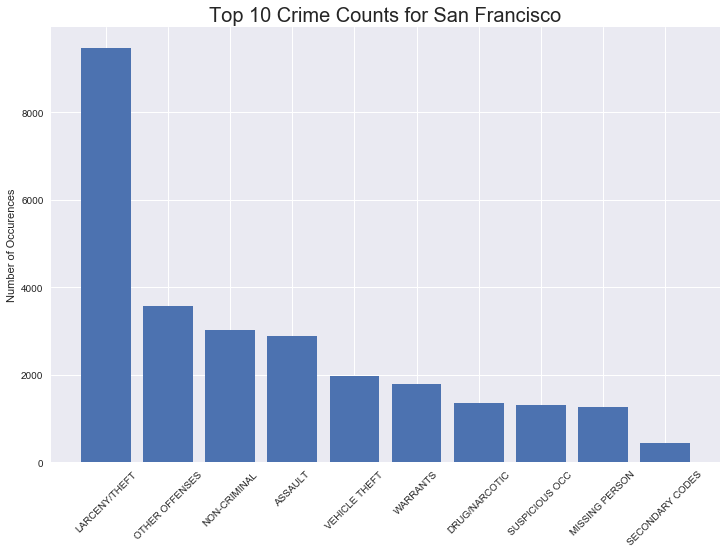

In [236]:
plt.figure(figsize=(12,8))
plt.bar(np.arange(10),top10_sf.Counts)
plt.xticks(np.arange(10),top10_sf.index,rotation=45)
plt.ylabel('Number of Occurences')
plt.title("Top 10 Crime Counts for San Francisco",fontsize=20)

We see that larcency/theft are the most common crimes in San Francisco. This type of crime accounts for almost 1/3 of the total crimes in SF.

# SF Crimes by Time and Date

I first consider the crime occurences by month.

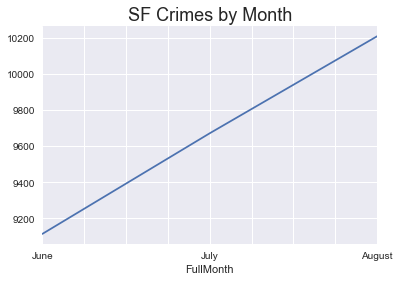

In [237]:
sf_data.groupby('FullMonth').size().plot()
plt.title('SF Crimes by Month',fontsize=18)

We see the number of crime incidents increase by month in the summer: June has the lowest number of occurences and August has the highest number of occurences.

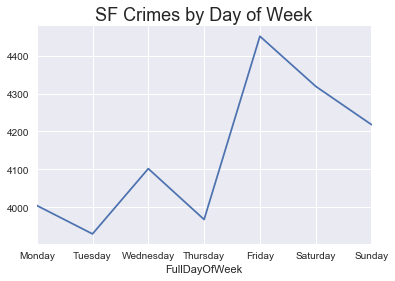

In [238]:
sf_data.groupby('FullDayOfWeek').size().plot()
plt.title('SF Crimes by Day of Week',fontsize=18)

We see San Francisco has highest number of crime incidents on Fridays, and many more in the weekends than in the weekday.

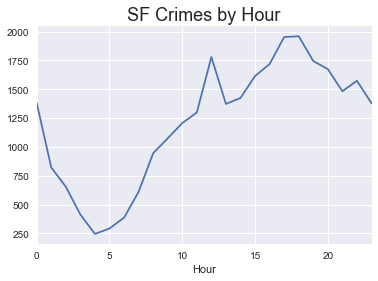

In [239]:
sf_data.groupby('Hour').size().plot()
plt.title('SF Crimes by Hour',fontsize=18)

The number of crime incidents is highest at 5 to 6 pm and is usually high in the evening and night. Crime incidents are least common at arount 4 am.

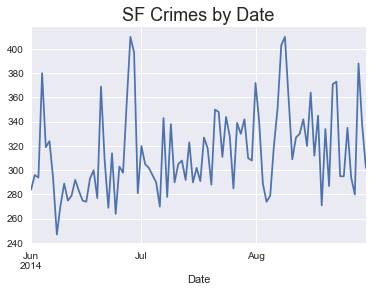

In [240]:
sf_data.groupby('Date').size().plot()
plt.title('SF Crimes by Date',fontsize=18)

The number of crime incidents seems to be unusually high at the end of June and at the beginning of August.

# SF Crimes by Categories

I use the following defined categories for analysis.

In [241]:
map_categories = {
'[INC - CASE DC USE ONLY]': 'OTHER OFFENSES',
'ANIMAL COMPLAINT': 'OTHER OFFENSES',
'ANIMAL-OTH': 'OTHER OFFENSES',
'ANIMAL-BITE': 'OTHER OFFENSES',
'ANIMAL-CRUELTY': 'OTHER OFFENSES', 
'ARSON': 'PROPERTY',
'ASSLT-NONAGG': 'PERSONAL',
'ASSLT-AGG-POLICE-GUN': 'PERSONAL',
'ASSLT-AGG-WEAPON': 'PERSONAL',
'ASSLT-AGG-BODYFORCE': 'PERSONAL',
'ASSLT-NONAGG-POLICE': 'PERSONAL',
'ASSLT-AGG-GUN': 'PERSONAL',
'ASSLT-AGG-POLICE-WEAPON': 'PERSONAL',
'ASSLT-AGG-POLICE-BODYFORCE': 'PERSONAL',  
'ASSAULT': 'PERSONAL',
'BIAS INCIDENT': 'INCHOATE',
'BIKE THEFT': 'PROPERTY',
'BRIBERY': 'PROPERTY',
'BURGLARY': 'PROPERTY',
'BURGLARY-SECURE PARKING-RES': 'PROPERTY',
'BURGLARY-FORCE-RES' : 'PROPERTY',
'BURGLARY-NOFORCE-RES': 'PROPERTY',
'BURGLARY-FORCE-NONRES': 'PROPERTY',
'BURGLARY-NOFORCE-NONRES': 'PROPERTY',
'BURGLARY-SECURE PARKING-NONRES':'PROPERTY',
'CAR PROWL': 'INCHOATE',
'COUNTERFEIT': 'PROPERTY',
'DISORDERLY CONDUCT': 'INCHOATE',
'DISPUTE': 'INCHOATE',
'DISPUTE-CIVIL PROPERTY (AUTO)': 'INCHOATE',
'DISPUTE-OTH': 'INCHOATE',
'DISPUTE-CIVIL PROPERTY (NON AU': 'INCHOATE',
'DISTURBANCE': 'INCHOATE',
'DISTURBANCE-OTH': 'INCHOATE',
'DISTURBANCE-NOISE': 'INCHOATE',
'DRIVING UNDER THE INFLUENCE': 'STATUTORY',
'DRIVE-BY': 'STATUTORY',
'DRUG/NARCOTIC': 'STATUTORY',
'DRUNKENNESS': 'STATUTORY',
'DUI': 'STATUTORY',
'DUI-DRUGS': 'STATUTORY',
'DUI-LIQUOR': 'STATUTORY',
'ELUDING': 'INCHOATE',
'ELUDING-FELONY FLIGHT': 'INCHOATE',
'EMBEZZLE': 'PROPERTY',
'EMBEZZLEMENT': 'PROPERTY',
'ENDANGERMENT':'INCHOATE',
'ESCAPE': 'STATUTORY',
'EXTORTION': 'INCHOATE',
'FALSE REPORT': 'INCHOATE',
'FAMILY OFFENSES': 'INCHOATE',
'FIREWORK': 'PROPERTY',
'FIREWORK-USE' : 'PROPERTY',
'FIREWORK-POSSESS': 'PROPERTY',
'FORGERY': 'PROPERTY',
'FORGERY/COUNTERFEITING': 'PROPERTY',
'FORGERY-CHECK': 'PROPERTY',
'FORGERY-OTH': 'PROPERTY',
'FORGERY-CREDIT CARD': 'PROPERTY',   
'FRAUD': 'PROPERTY',
'FRAUD-CHECK': 'PROPERTY',
'FRAUD-IDENTITY THEFT': 'PROPERTY',
'FRAUD-CREDIT CARD': 'PROPERTY',
'FRAUD-OTHER': 'PROPERTY',
'FRAUD-COMPUTER': 'PROPERTY',
'FRAUD-WIRE-ELECTRONIC': 'PROPERTY',
'GAMBLING': 'PROPERTY',
'HARASSMENT': 'PERSONAL',
'HOMICIDE': 'PERSONAL',
'HOMICIDE-JUST-WEAPON': 'PERSONAL',
'HOMICIDE-JUST-GUN': 'PERSONAL',
'HOMICIDE-PREMEDITATED-GUN' : 'PERSONAL',  
'ILLEGAL DUMPING': 'STATUTORY',
'INJURY': 'PERSONAL',
'INJURY - ACCIDENTAL': 'PERSONAL',
'INJURY - OTHER': 'PERSONAL',
'KIDNAPPING': 'PERSONAL',
'LARCENY/THEFT': 'PROPERTY',
'LIQUOR LAWS': 'STATUTORY',
'LIQUOR VIOLATION': 'STATUTORY',
'LIQUOR LAW VIOLATION': 'STATUTORY',
'LOITERING': 'INCHOATE',
'LOST PROPERTY': 'PROPERTY',
'MAIL THEFT': 'PROPERTY',
'MISSING PERSON': 'PERSONAL',
'MALICIOUS HARASSMENT':'PERSONAL',
'NARCOTICS': 'STATUTORY',
'NARC-FOUND-OTHER': 'STATUTORY',
'NARC-POSSESS-HALLUCINOGEN': 'STATUTORY',
'NARC-POSSESS-METH': 'STATUTORY',
'NARC-FOUND-MARIJU': 'STATUTORY',
'NARC-POSSESS-COCAINE': 'STATUTORY',
'NARC-EQUIPMENT/PARAPHENALIA': 'STATUTORY',
'NARC-POSSESS-AMPHETAMINE': 'STATUTORY',
'NARC-SELL-HEROIN': 'STATUTORY',
'NARC-POSSESS-HEROIN': 'STATUTORY',
'NARC-SELL-COCAINE': 'STATUTORY',
'NARC-FOUND-AMPHETAMINE': 'STATUTORY',
'NARC-FOUND-HEROIN': 'STATUTORY',
'NARC-POSSESS-OTHER': 'STATUTORY',
'NARC-SELL-METH': 'STATUTORY',
'NARC-FOUND-SYNTHETIC': 'STATUTORY',
'NARC-POSSESS-MARIJU': 'STATUTORY',
'NARC-FOUND-COCAINE': 'STATUTORY', 
'NARC-FORGERY-PRESCRIPTION' : 'STATUTORY', 
'NARC-SELL-AMPHETAMINE': 'STATUTORY', 
'NARC-DRUG TRAFFIC LOITERING': 'STATUTORY', 
'NARC-FOUND-OPIUM': 'STATUTORY', 
'NARC-POSSESS-PILL/TABLET': 'STATUTORY',
'NARC-FOUND-METH': 'STATUTORY',
'NARC-FRAUD-PRESCRIPTION':'STATUTORY',
'NARC-SMUGGLE-OTHER':'STATUTORY',
'NARC-SELL-SYNTHETIC':'STATUTORY', 
'NARC-SELL-MARIJU':'STATUTORY', 
'NARC-PRODUCE-MARIJU' :'STATUTORY',  
'NON-CRIMINAL': 'NON-CRIMINAL',
'OBSTRUCT': 'PROPERTY',
'OTHER OFFENSES': 'OTHER OFFENSES',
'OTHER PROPERTY': 'PROPERTY',
'PICKPOCKET': 'PROPERTY',
'PORNOGRAPHY': 'INCHOATE',
'PORNOGRAPHY/OBSCENE MAT': 'INCHOATE',
'PORNOGRAPHY-OBSCENE MATERIAL' : 'INCHOATE', 
'PROPERTY DAMAGE': 'PROPERTY',
'PROPERTY DAMAGE-RESIDENTIAL': 'PROPERTY',
'PROPERTY DAMAGE-NON RESIDENTIA': 'PROPERTY',
'PROPERTY FOUND': 'PROPERTY',
'PROPERTY DAMAGE - GRAFFITI': 'PROPERTY',
'PROPERTY STOLEN-POSSESS': 'PROPERTY',
'PROPERTY LOST': 'PROPERTY',
'PROPERTY LOST - POLICE EQUIPME':'PROPERTY',
'PROPERTY STOLEN-TRAFFICKING' :'PROPERTY',  
'PROP RECOVERED-OTHER AGENCY': 'PROPERTY',
'PROPERTY STOLEN-SELL': 'PROPERTY',
'PROSTITUTION': 'INCHOATE',
'PROSTITUTION PATRONIZING': 'INCHOATE',
'PROSTITUTION LOITERING' : 'INCHOATE', 
'PROSTITUTION-ASSIST-PROMOTE': 'INCHOATE',
'PUBLIC NUISANCE': 'INCHOATE',
'PURSE SNATCH': 'PROPERTY',
'RECKLESS BURNING': 'PROPERTY',
'RECOVERED PROPERTY': 'PROPERTY',
'ROBBERY': 'PROPERTY',
'ROBBERY-STREET-BODYFORCE': 'PROPERTY',
'ROBBERY-BUSINESS-BODYFORCE': 'PROPERTY',
'ROBBERY-BANK-WEAPON':'PROPERTY',
'ROBBERY-BUSINESS-WEAPON':'PROPERTY',
'ROBBERY-STREET-GUN':'PROPERTY',
'ROBBERY-RESIDENCE-BODYFORCE':'PROPERTY',
'ROBBERY-STREET-WEAPON':'PROPERTY',
'ROBBERY-BUSINESS-GUN':'PROPERTY',
'ROBBERY-RESIDENCE-WEAPON':'PROPERTY',
'ROBBERY-BANK-GUN':'PROPERTY',
'ROBBERY-RESIDENCE-GUN':'PROPERTY',
'ROBBERY-BANK-BODYFORCE':'PROPERTY',
'RUNAWAY': 'INCHOATE',
'SECONDARY CODES': 'STATUTORY',
'SHOPLIFTING': 'PROPERTY',
'STOLEN PROPERTY': 'PROPERTY',
'SUICIDE': 'PERSONAL',
'SUSPICIOUS OCC': 'PROPERTY',
'THEFT OF SERVICES': 'PROPERTY',
'THEFT-BICYCLE': 'PROPERTY',
'THEFT-BUILDING': 'PROPERTY',
'THEFT-CARPROWL': 'PROPERTY',
'THEFT-SHOPLIFT':'PROPERTY',
'THEFT-OTH': 'PROPERTY',
'THEFT-PKPOCKET': 'PROPERTY',
'THEFT-LICENSE PLATE': 'PROPERTY',
'THEFT-AUTOACC': 'PROPERTY',
'THEFT-MAIL': 'PROPERTY',
'THEFT-PRSNATCH' : 'PROPERTY',  
'THEFT-AUTO PARTS': 'PROPERTY',
'THEFT-COINOP': 'PROPERTY',
'THEFT-BOAT': 'PROPERTY',
'THREATS': 'INCHOATE',
'THREATS-OTHER' : 'INCHOATE', 
'THREATS-KILL': 'INCHOATE',
'THREATS-WEAPON': 'INCHOATE',
'TRAFFIC': 'STATUTORY',
'TRESPASS': 'INCHOATE',
'URINATING/DEFECATING-IN PUBLIC':'INCHOATE',  
'VANDALISM': 'PROPERTY',
'VEH-THEFT-MTRCYCLE': 'PROPERTY',
'VEHICLE THEFT': 'PROPERTY',
'VEH-THEFT-AUTO': 'PROPERTY',
'VEH-THEFT-TRUCK': 'PROPERTY',
'VEH-THEFT-OTHVEH': 'PROPERTY',
'VEH-RCVD-FOR OTHER AGENCY': 'PROPERTY',
'VEH-THEFT-TRAILER': 'PROPERTY',
'VIOLATION OF COURT ORDER': 'STATUTORY',
'VIOL-COURT ORDER': 'STATUTORY',
'WARRANT ARREST': 'STATUTORY',
'WARRANTS': 'STATUTORY',
'WARRANT-FUGITIVE': 'STATUTORY',
'WARRARR-MISDEMEANOR': 'STATUTORY',
'WARRARR-FELONY': 'STATUTORY',
'WEAPON': 'STATUTORY',
'WEAPON-CONCEALED': 'STATUTORY',
'WEAPON-SELLING':'STATUTORY',
'WEAPON LAWS': 'STATUTORY',
'WEAPON-POSSESSION':'STATUTORY',
'WEAPON-UNLAWFUL USE':'STATUTORY',
'WEAPON-SURRENDER-EXCLUDING FIR' : 'STATUTORY',
'WEAPON-DISCHARGE':'STATUTORY'
}

Now we have a smaller set of categories.

In [242]:
seattle_data['incident_category']=seattle_data['Offense Type'].apply(lambda col: map_categories[col])


In [243]:
sf_data['incident_category']=sf_data['Category'].apply(lambda col: map_categories[col])


In [244]:
sf_data.head(5)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,...,Location,PdId,Hour,Day,Week,Month,Year,FullDayOfWeek,FullMonth,incident_category
0,140734311,ARSON,ARSON OF A VEHICLE,6,2014-08-31,2017-08-28 23:50:00,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,...,"(37.7383221869053, -122.405646994567)",14073431126031,23,31,35,8,2014,Sunday,August,PROPERTY
1,140736317,NON-CRIMINAL,LOST PROPERTY,6,2014-08-31,2017-08-28 23:45:00,MISSION,NONE,400 Block of CASTRO ST,-122.435012,...,"(37.7617677182954, -122.435012093789)",14073631771000,23,31,35,8,2014,Sunday,August,NON-CRIMINAL
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,6,2014-08-31,2017-08-28 23:30:00,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,...,"(37.7800356268394, -122.409795194505)",14617792306244,23,31,35,8,2014,Sunday,August,PROPERTY
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,6,2014-08-31,2017-08-28 23:30:00,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,...,"(37.7725176473142, -122.485262988324)",14617753106244,23,31,35,8,2014,Sunday,August,PROPERTY
4,140734220,NON-CRIMINAL,FOUND PROPERTY,6,2014-08-31,2017-08-28 23:23:00,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,...,"(37.7723131976814, -122.509895418239)",14073422072000,23,31,35,8,2014,Sunday,August,NON-CRIMINAL


# Incident Trend by Category

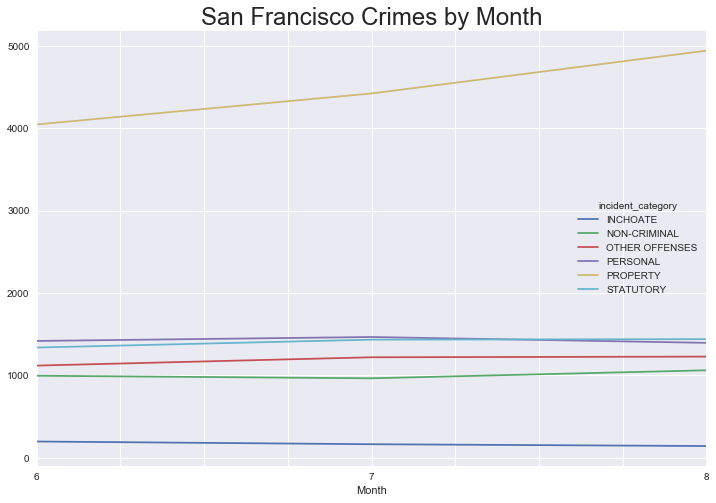

In [245]:
sf_by_month=sf_data.pivot_table('IncidntNum',aggfunc='count',
                              index='Month', 
                              columns='incident_category')
ax=sf_by_month.plot(figsize=(12,8))
ax.set_title("San Francisco Crimes by Month",fontsize=24)

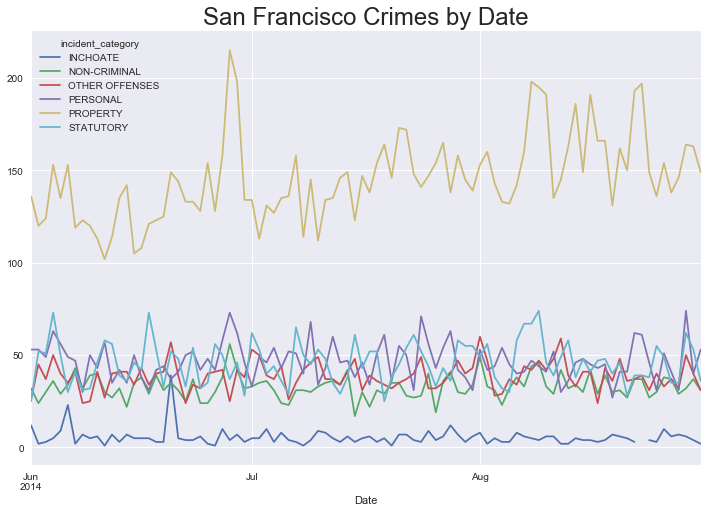

In [246]:
sf_by_date=sf_data.pivot_table('IncidntNum',aggfunc='count',
                              index='Date', 
                              columns='incident_category')
ax=sf_by_date.plot(figsize=(12,8))
ax.set_title("San Francisco Crimes by Date",fontsize=24)

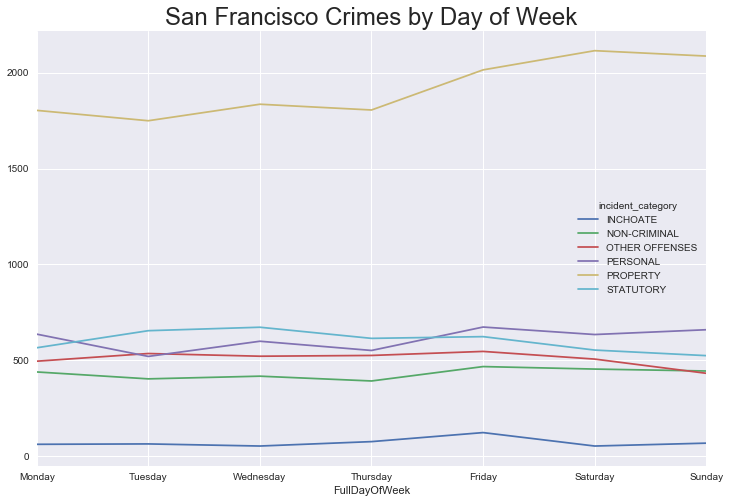

In [247]:
sf_by_weekday=sf_data.pivot_table('IncidntNum',aggfunc='count',
                              index='FullDayOfWeek', 
                              columns='incident_category')
ax=sf_by_weekday.plot(figsize=(12,8))
ax.set_title("San Francisco Crimes by Day of Week",fontsize=24)

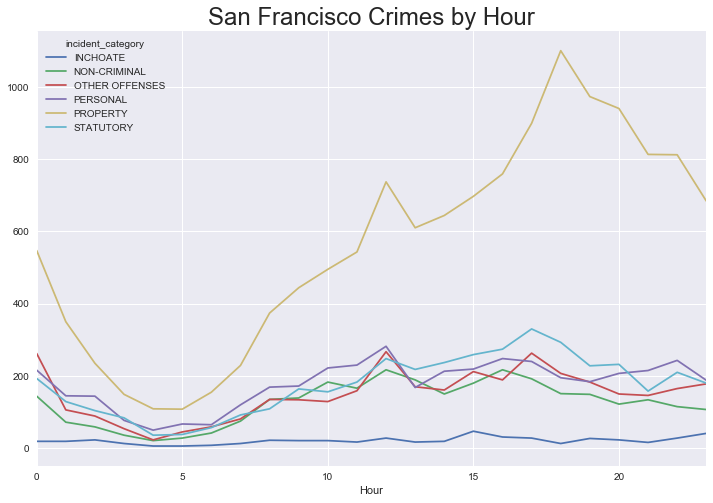

In [248]:
sf_by_hour=sf_data.pivot_table('IncidntNum',aggfunc='count',
                              index='Hour', 
                              columns='incident_category')
ax=sf_by_hour.plot(figsize=(12,8))
ax.set_title("San Francisco Crimes by Hour",fontsize=24)

We see that property crimes have the highest number of incidents. Property crimes are also most common in the evenings. The number of property crimes increases by month, but the number of other types of crimes doesn't change much for each month in the summer.

Now I'd like to analyze crime types of theft and burglary in detail.

In [249]:
theftBurglary = ['LARCENY/THEFT', 'VEHICLE THEFT', 'ROBBERY', 'BURGLARY', 'STOLEN PROPERTY']

In [251]:
def  category_by_hour(category,nrow,ncol,dataset):
    fig=plt.figure(figsize=(10,10))
    fig.suptitle("by hour of the week")
    for i in range(1,len(category)+1):
        ax='ax'+str(i)
        ax=fig.add_subplot(nrow,ncol,i)
        ax.hist(dataset.loc[dataset['Category']==category[i-1],'Hour'],bins=24,color='g')
        ax.set_title(category[i-1])
   # plt.suptitle("by hour of the week")
    plt.tight_layout()
    plt.show()

In [252]:
def  category_by_dayofweek(category,nrow,ncol,dataset):
    fig=plt.figure(figsize=(10,10))
    for i in range(1,len(category)+1):
        ax='ax'+str(i)
        ax=fig.add_subplot(nrow,ncol,i)
        ax.hist(dataset.loc[dataset['Category']==category[i-1],'DayOfWeek'],bins=24,color='g')
        ax.set_title(category[i-1])
    plt.suptitle("by day of the week")
    plt.tight_layout()
    plt.show()

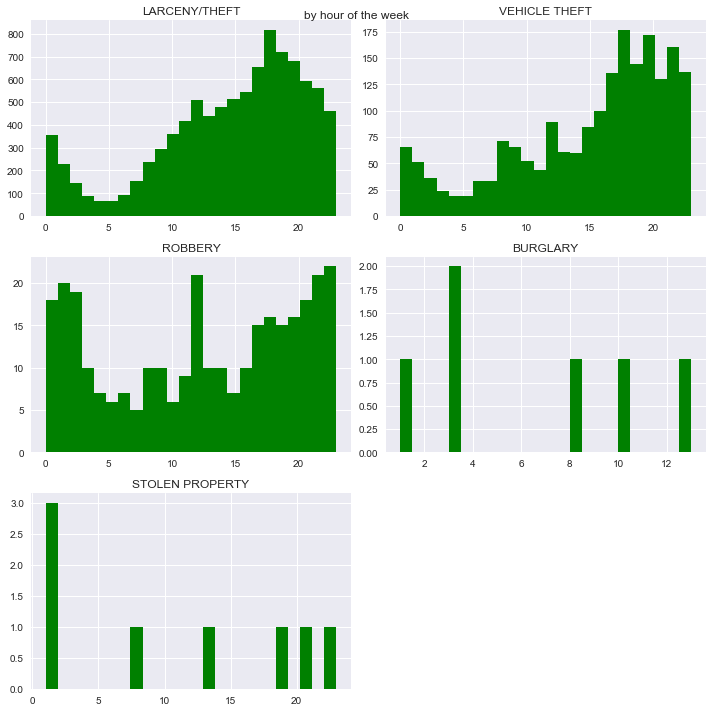

In [253]:
category_by_hour(theftBurglary,3,2,sf_data)

We see that largency/theft, vehicle theft and robbery are common in the evenings.Robbery, burglary, stolen properties are common in early mornings. The pattens of largency/theft and vehicle theft are quite similar.

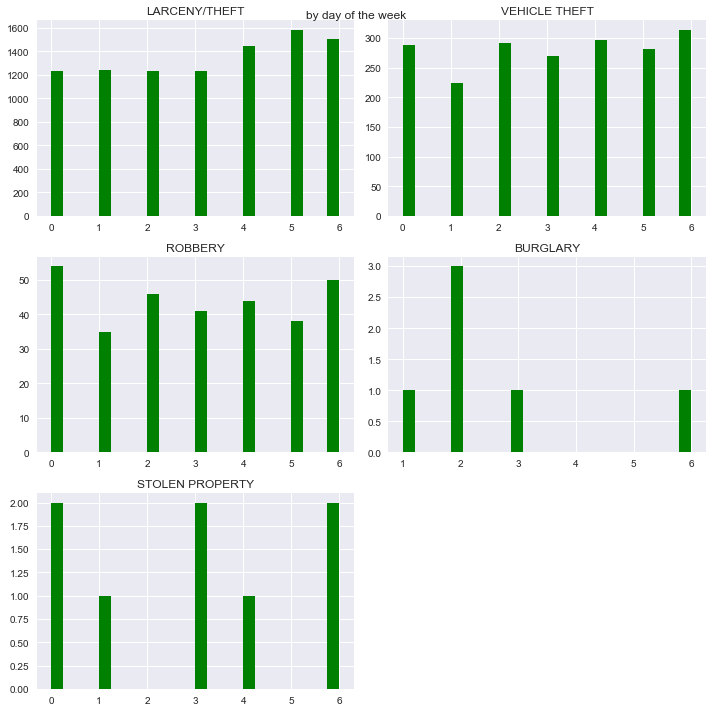

In [254]:
category_by_dayofweek(theftBurglary,3,2,sf_data)

Now I analyze robbery in detail.

In [255]:
def plot_hourly_crime(data, crime): 
              subset_data = data[data['Category'] == crime]
              hourly_subset = subset_data.groupby(['FullDayOfWeek', 'Hour'], as_index=True).count().reset_index()
              hourly_subset['Category'] = hourly_subset['Category'].astype('float64') 
              hourly_subset['FullDayOfWeek'] = hourly_subset['FullDayOfWeek'].astype('object')
              # Fill in NaN's with 0 if there are any that came up counting over sub-groups
              hourly_subset = hourly_subset[['Hour', 'Category', 'FullDayOfWeek']].fillna(0)
              hourly_subset = hourly_subset.rename(columns={'Category': 'Count'})
              # Get the averages of the hourly data.
              avg_hourly = hourly_subset.groupby(['Hour'], as_index=False).mean()
              avg_hourly['FullDayOfWeek'] = 'Average'
              # Add in Averages as their own entry
              full_hourly = pd.concat([hourly_subset, avg_hourly], axis=0)
              # Specify the order of days to be plotted
              day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                           'Friday', 'Saturday', 'Sunday']
              col_order = ['Average'] + day_names
              # Reformat the time for the plot
              time_labels = ['%02d:00' % x for x in np.arange(24)]
              # Plot the crime
              grid = sns.factorplot(data=full_hourly,
                                    x='Hour', y='Count',
                                    hue='FullDayOfWeek',
                                    col='FullDayOfWeek',
                                    col_wrap=4,
                                    col_order=col_order,
                                    size=5, palette='Set2')
              # Add labels/rotate x-axis
              grid.set_xticklabels(labels=time_labels, rotation=90)
              grid.set(ylim=(0, None)) # Start y-axis at 0, no neg. crime counts plt.subplots_adjust(top=0.93) # Make room for main title
              grid.fig.suptitle('{} Counts for Each Day of the Week Per Hour (Avg. included)'.format(crime.title()),size=15)
 

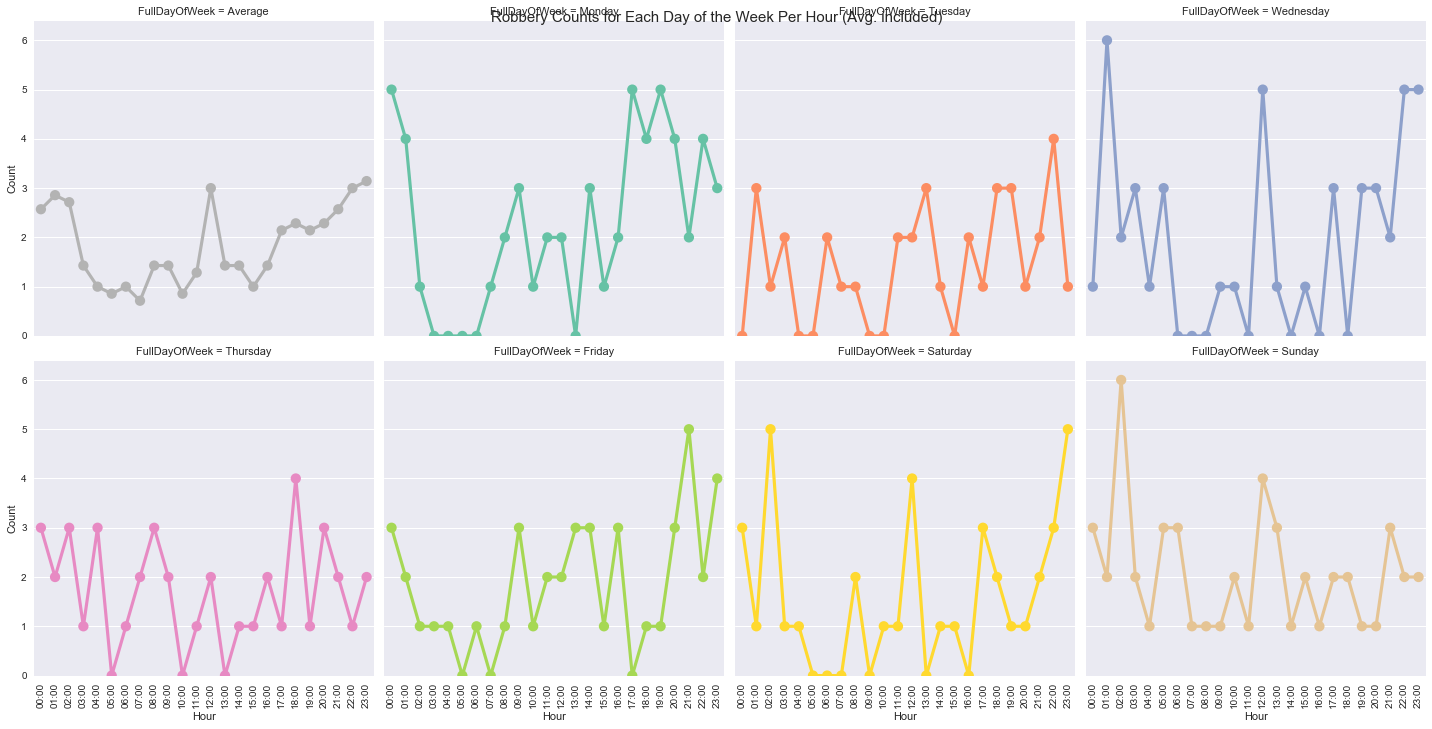

In [298]:
plot_hourly_crime(sf_data, 'ROBBERY')

We see on the number of occurence of robbery is high in the early morning, late at night and sometimes in the mid of day.

# Seattle Crime Trend

Again I will select crimes with the top 10 highest incident numbers for further analysis.

In [296]:
seattle_data.Category.value_counts().sum()

31590L

In [256]:
top10_seattle=pd.DataFrame({'Counts':seattle_data.Category.value_counts()[:10]})

In [257]:
top10_seattle

,Counts
CAR PROWL,6036
OTHER PROPERTY,3482
BURGLARY,3088
VEHICLE THEFT,2997
PROPERTY DAMAGE,2310
ASSAULT,1978
FRAUD,1325
DISTURBANCE,1309
THREATS,1143
STOLEN PROPERTY,1103


The ratio of the number of car prowl with the the number of total crimes is

In [297]:
6036.0/31590

0.19107312440645774

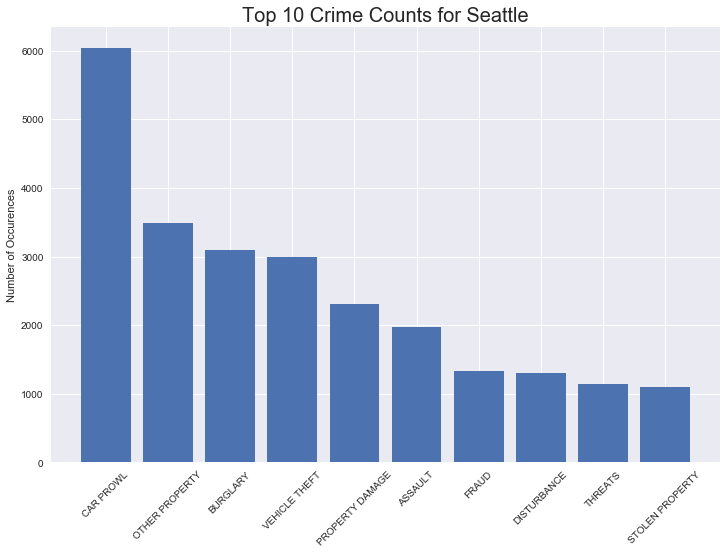

In [258]:
plt.figure(figsize=(12,8))
plt.bar(np.arange(10),top10_seattle.Counts)
plt.xticks(np.arange(10),top10_seattle.index,rotation=45)
plt.ylabel('Number of Occurences')
plt.title("Top 10 Crime Counts for Seattle",fontsize=20)

The most common crime in Seattle is car prowl. The type of crimes accounts for almost 1/5 of the total crimes.

# Seattle Crimes by Time and Date

The population in San Francisco is 852,537 and the population in Seattle is 667,963. The population ratio is 

In [280]:
pop_ratio=852537.0/667963

In [283]:
seattle_data.groupby('FullMonth').size()

FullMonth
August     9557
July      11024
June      11009
dtype: int64

In [281]:
seattle_data.groupby('FullMonth').size()*pop_ratio

FullMonth
August    12197.825492
July      14070.192343
June      14051.047488
dtype: float64

In [282]:
sf_data.groupby('FullMonth').size()

FullMonth
June       9114
July       9671
August    10208
dtype: int64

Apparently Seattle has more crimes compared to San Francisco per capita.

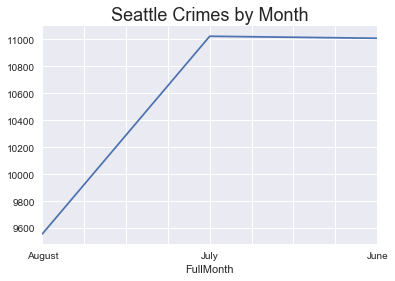

In [299]:
seattle_data.groupby('FullMonth').size().plot()
plt.title('Seattle Crimes by Month',fontsize=18)

Unlike San Francisco, Seattle has higher number of crimes in June and July than in August.

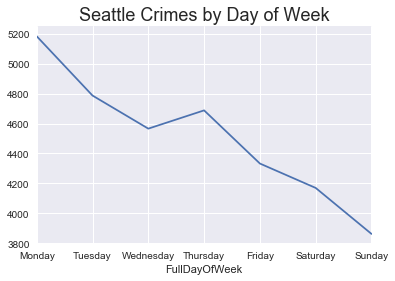

In [300]:
seattle_data.groupby('FullDayOfWeek').size().plot()
plt.title('Seattle Crimes by Day of Week',fontsize=18)

The number of crime incidents in Seattle decrease during a week. Monday has the highest number of crimes while Sunday has the lowest number of crimes.

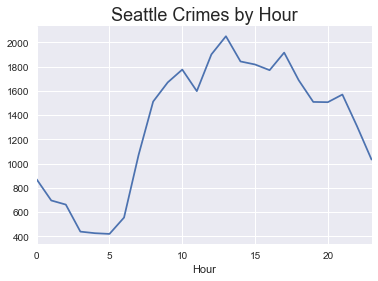

In [261]:
seattle_data.groupby('Hour').size().plot()
plt.title('Seattle Crimes by Hour',fontsize=18)

Crimes are most common during the noon and the number of crimes decreases afterwards.

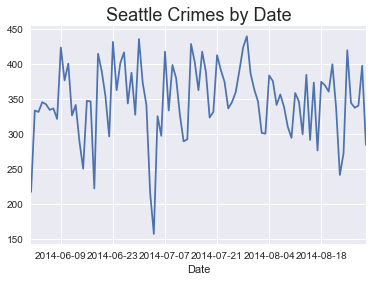

In [262]:
seattle_data.groupby('Date').size().plot()
plt.title('Seattle Crimes by Date',fontsize=18)

At the beginning of July, Seattle has unusually low number of crimes. There's no upward or downward trend for number of crimes during three months.

# Incident Trend by Category

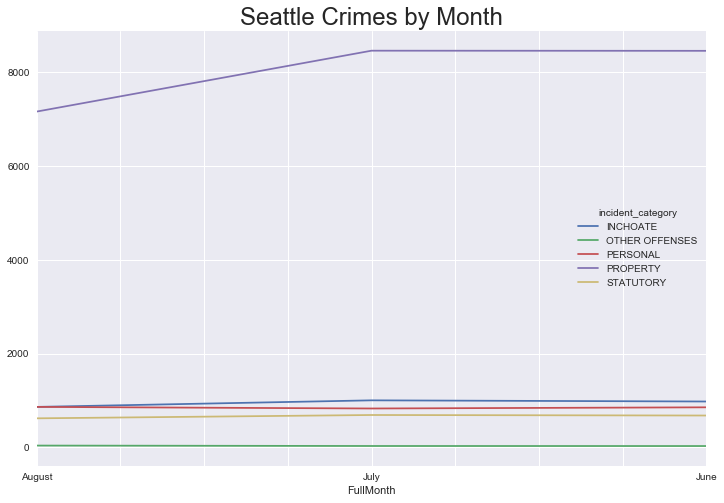

In [312]:
seattle_by_month=seattle_data.pivot_table('General Offense Number',aggfunc='count',
                              index='FullMonth', 
                              columns='incident_category')
ax=seattle_by_month.plot(figsize=(12,8))
ax.set_title("Seattle Crimes by Month",fontsize=24)

Property crimes are most common in Seattle. Seattle has higher number of property crimes in June and July than in August. For other types of crimes, there's no obvious upward or downward trend for the number of crimes during three months.

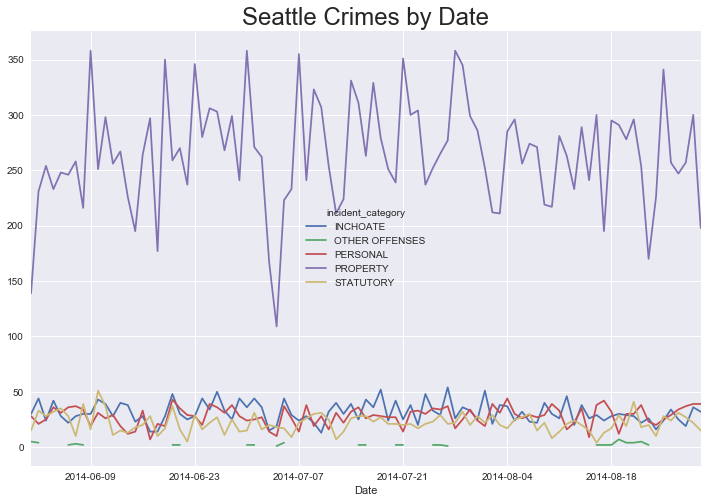

In [313]:
seattle_by_date=seattle_data.pivot_table('General Offense Number',aggfunc='count',
                              index='Date', 
                              columns='incident_category')
ax=seattle_by_date.plot(figsize=(12,8))
ax.set_title("Seattle Crimes by Date",fontsize=24)

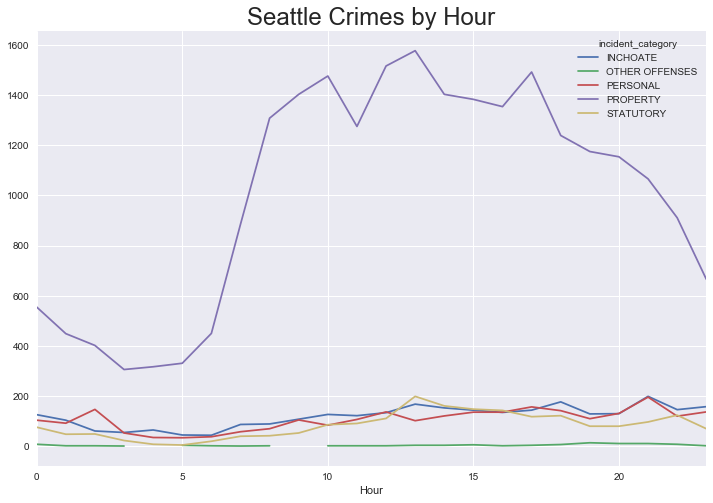

In [319]:
seattle_by_hour=seattle_data.pivot_table('General Offense Number',aggfunc='count',
                              index='Hour', 
                              columns='incident_category')
ax=seattle_by_hour.plot(figsize=(12,8))
ax.set_title("Seattle Crimes by Hour",fontsize=24)

Property crimes are most common during noon, late in the morning, and before evening. For other types of crimes, there are no obvious trend for the number of crimes.

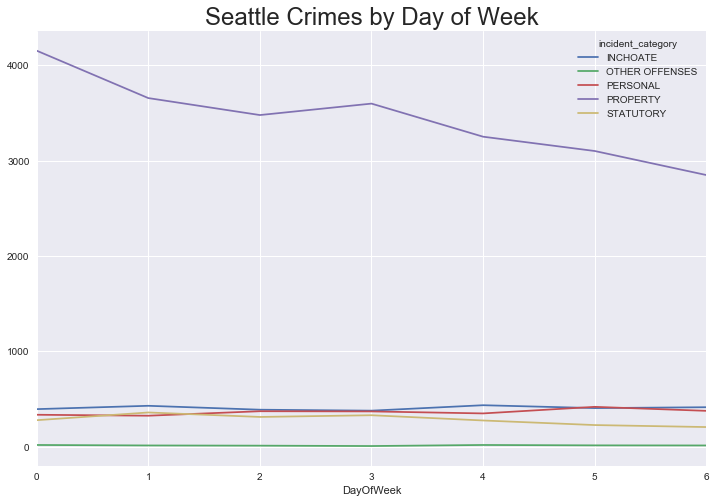

In [316]:
seattle_by_dayofweek=seattle_data.pivot_table('General Offense Number',aggfunc='count',
                              index='DayOfWeek', 
                              columns='incident_category')
ax=seattle_by_dayofweek.plot(figsize=(12,8))
ax.set_title("Seattle Crimes by Day of Week",fontsize=24)

The number of property crimes decrease in a week. For other types of crimes, there are no obvious trend for the number of crimes.

Again I'd like to analyze theft and burglary in detail.

In [317]:
theftBurglary = ['VEHICLE THEFT', 'ROBBERY', 'BURGLARY', 'STOLEN PROPERTY']

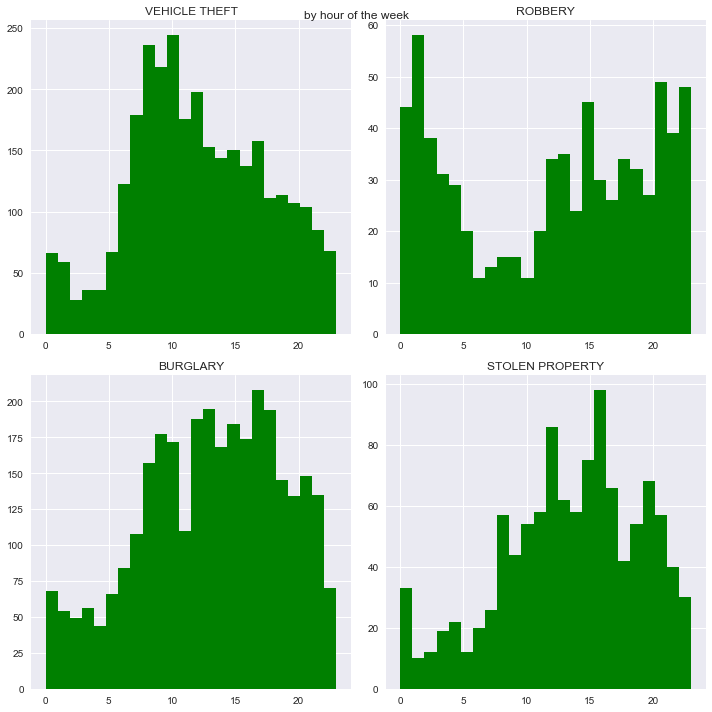

In [318]:
category_by_hour(theftBurglary,2,2,seattle_data)

Robbery are most common during early morning, afternoon and afterwards.Burglary and stolen property have highest number of occurences in the late afternoon.Vehicle theft is most common in the late morning.

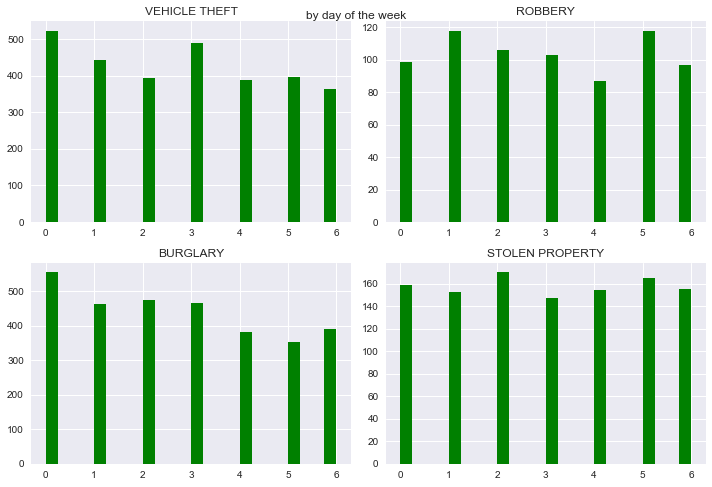

In [270]:
category_by_dayofweek(theftBurglary,3,2,seattle_data)

There is no obvious difference of number of occurenes of theft/burglary crimes in different days of a week.

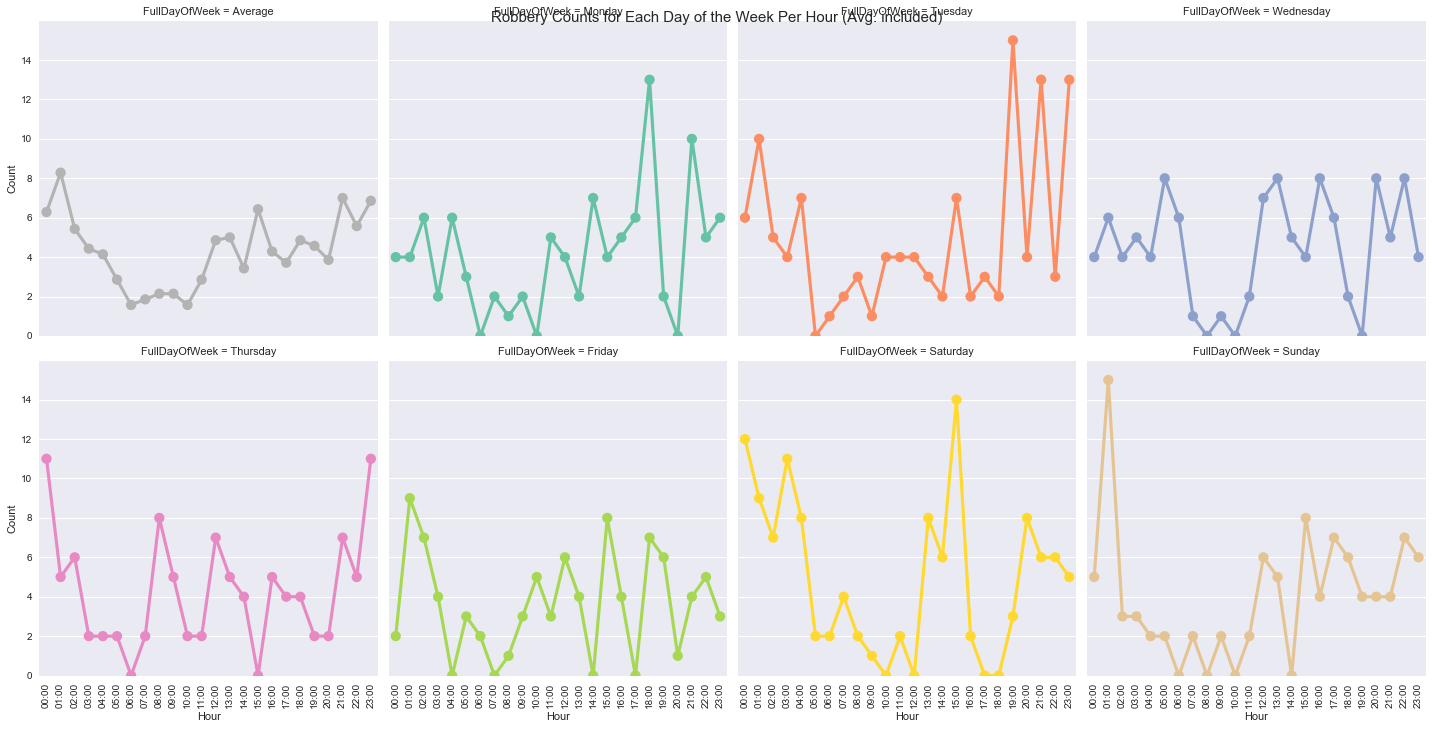

In [271]:
plot_hourly_crime(seattle_data, 'ROBBERY')

On average, robbery crimes are common in the early morning and in the evening.